In [1]:
# used for manipulating directory paths
import os
# For N-dimensional array manipulation
import numpy as np
# For advanced mathematical routines
import scipy
# Plotting library
import matplotlib.pyplot as plt
# For data analysis and data structures in DataFrames 
import pandas as pd
# For data visualization
import seaborn as sn
# For machine learning algorithms and evaluation metrics
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
# tells matplotlib to embed plots within the notebook
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
# Loading the data from CSV into panadas dataframe
df = pd.read_csv ('../data/topFiveFeats211207.csv', sep=',')

In [3]:
# print top 5 lines 
df.head()

,3m,1m,reportedEPS,totalNonCurrentAssets,depreciationAndAmortization,currentAccountsPayable,profitLoss
0,0.033148,0.064982,-0.071429,-0.001280,0.012513,0.007028,-0.079814
1,0.121244,0.076218,-0.166667,0.078745,0.049137,-0.371503,-0.178230
2,-0.079433,-0.005502,1.301370,0.109743,-0.013323,0.509504,0.164689
3,0.145756,-0.060012,0.123077,0.016336,-0.018169,0.197339,1.193993
4,-0.682538,0.165132,0.015625,0.003578,-0.012204,0.089572,0.000356


In [4]:
# print length of '1m' 
data_to_use = df['1m'].values
print('Total number of data in the dataset: {}'.format(len(data_to_use)))

Total number of data in the dataset: 3564


# Data processing
## Scaling data

In [5]:
scaler = StandardScaler()

In [6]:
scaled_dataset = scaler.fit_transform(data_to_use.reshape(-1, 1))

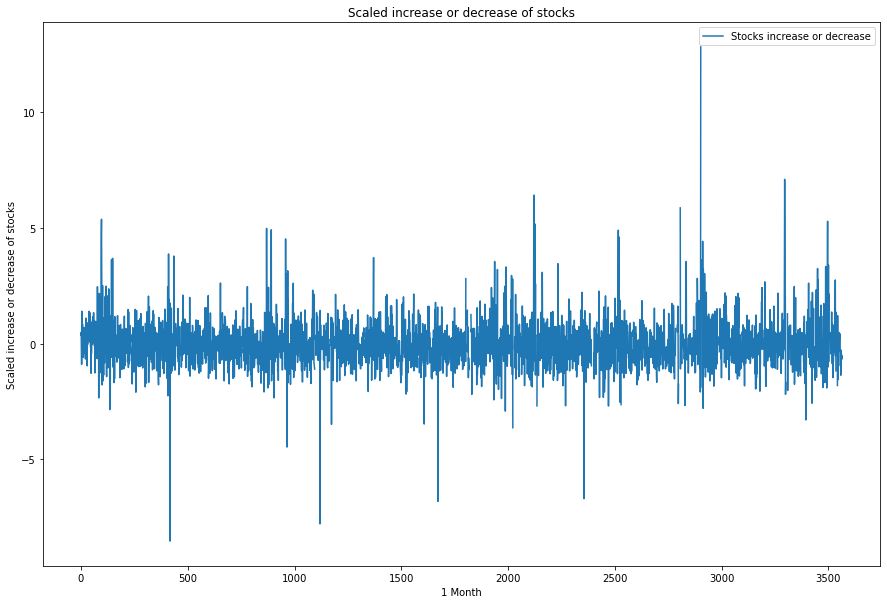

In [7]:
plt.figure(figsize=(15,10), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Scaled increase or decrease of stocks')
plt.xlabel('1 Month')
plt.ylabel('Scaled increase or decrease of stocks')
plt.plot(scaled_dataset, label='Stocks increase or decrease')
plt.legend()
plt.show()

In [8]:
 # for soem reason there are Infs in the dataset
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.replace(np.nan, df.mean(), inplace=True)

# Checking for NaNs and infs
print(df.isnull().sum().sum())
print(np.isinf(df).values.sum())


0
0


# Split dataset

In [9]:
from sklearn.model_selection import train_test_split

column_features = ["reportedEPS","totalNonCurrentAssets","depreciationAndAmortization","currentAccountsPayable", "profitLoss"]

features = df[column_features].to_numpy()
row_sums = features.sum(axis=1)
X = features / row_sums[:, np.newaxis]

print('shape of X ',X.shape)
y = df["1m"].to_numpy()
print('shape of y',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

shape of X  (3564, 5)
shape of y (3564,)
(2494, 5) (2494,) (1070, 5) (1070,)


/var/folders/ns/h76j0lmj3f36gyjjdrtlhg1r0000gn/T/ipykernel_58984/1980290653.py:7: RuntimeWarning: invalid value encountered in true_divide
  X = features / row_sums[:, np.newaxis]


In [10]:
# print null values and infinity
print(df.isnull().sum().sum())
print(np.isinf(df).values.sum())

0
0


In [11]:
def checkMissing(df):
    missing_count = df.isna().sum().sort_values(ascending= False)
    missing_count = missing_count[missing_count != 0]
    return missing_count
    
print(checkMissing(df))

Series([], dtype: int64)


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [13]:
# Making the toy model with tensorflow
model = tf.keras.models.Sequential()

model.add(Dropout(0.2))
# Layers
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 10, activation = 'sigmoid'))

2021-12-10 07:44:48.534740: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:

# there is error when changing loss='sparse_categorical_crossentropy' ,  Received a label value of -9223372036854775808 which is outside the valid range of [0, 10).
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs = 50, batch_size = 128)

Epoch 1/50
20/20 [==============================] - 0s 959us/step - loss: nan - accuracy: 8.0192e-04
Epoch 2/50
20/20 [==============================] - 0s 874us/step - loss: nan - accuracy: 8.0192e-04
Epoch 3/50
20/20 [==============================] - 0s 943us/step - loss: nan - accuracy: 8.0192e-04
Epoch 4/50
20/20 [==============================] - 0s 893us/step - loss: nan - accuracy: 8.0192e-04
Epoch 5/50
20/20 [==============================] - 0s 915us/step - loss: nan - accuracy: 8.0192e-04
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: nan - accuracy: 8.0192e-04
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: nan - accuracy: 8.0192e-04
Epoch 8/50
20/20 [==============================] - 0s 848us/step - loss: nan - accuracy: 8.0192e-04
Epoch 9/50
20/20 [==============================] - 0s 1ms/step - loss: nan - accuracy: 8.0192e-04
Epoch 10/50
20/20 [==============================] - 0s 1ms/step - loss: nan - accuracy: 8.0192e-

In [16]:
  # Model evaluation
accuracy = model.evaluate(X_train, y_train)
print('Train Accuracy : {}'.format(accuracy[1]))

78/78 [==============================] - 0s 563us/step - loss: nan - accuracy: 8.0192e-04
Train Accuracy : 0.0008019246160984039


In [17]:
  # Model evaluation
accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy : {}'.format(accuracy[1]))


34/34 [==============================] - 0s 615us/step - loss: nan - accuracy: 9.3458e-04
Test Accuracy : 0.0009345794678665698
